IndexError: index 0 is out of bounds for axis 0 with size 0

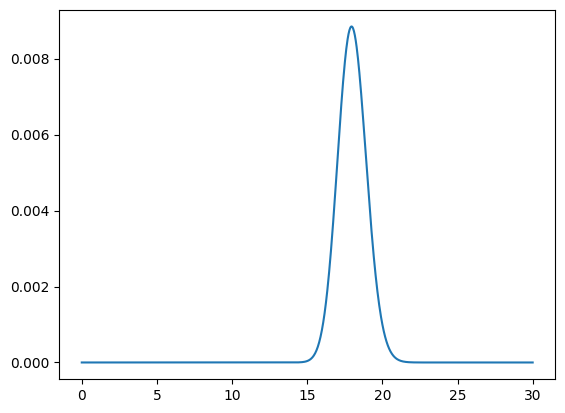

In [ ]:
"""
Context: Synthetic Bayesian modeling example for call-center rates.

Setup/problem:
- We model the number of calls X observed over T hours using a Poisson
  likelihood with rate λ per hour (so X ~ Poisson(T·λ)).
- This script uses a truncated normal prior over λ (> 0) and computes
  a numerical posterior on a grid to illustrate concepts like the
  posterior mean, mode, and a 94% interval.

Important note/disclaimer:
- The Lab 6, Ex. 2 assignment expects working with a conjugate prior
  and an analytic posterior for λ. This example intentionally uses a
  different prior and a numeric approach, and is NOT a template for the
  assignment solution. It also uses synthetic data (k, T) that do not
  match the assignment prompt.
"""

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

# Datele de intrare (exemplu sintetic)
# TODO: Înlocuiește cu datele corecte din contextul cerinței, dacă este cazul.
k = 180    # Numărul total de apeluri observate (sintetic)
T = 10      # Intervalul de timp în ore (sintetic)

# Parametrii distribuției prior normală trunchiată la zero
# TODO: Înlocuiește priorul cu forma cerută de cerință.
mu_prior = 18      # Presupunem că rata medie a priori este 15 apeluri/oră
sigma_prior = 5    # Presupunem o deviație standard de 5 apeluri/oră

alpha0 = 0.001 + k
beta0 = 0.001 + T


lambda_values = np.linspace(0.001, 30, 1000)  # Evităm zero pentru stabilitate numerică

# Funcția densitate a priori (normală trunchiată la zero)
prior_pdf = stats.gamma.pdf(
    lambda_values,
    a=alpha0,
    scale=1/beta0
)

# Funcția de verosimilitate Poisson
likelihood = stats.poisson.pmf(k, mu=T * lambda_values)

#p(posterior) = p(likelihood) * p(prior) / p(evidence)

posterior = likelihood * prior_pdf

plt.plot(lambda_values, posterior, label='Distribuția a posteriori a lui λ')

cumulative = np.cumsum(posterior) * (lambda_values[1] - lambda_values[0])
lower_idx = np.where(cumulative >= 0.03)[0][0]
upper_idx = np.where(cumulative <= 0.97)[0][-1]
lower_bound = lambda_values[lower_idx]
upper_bound = lambda_values[upper_idx]

print(f"Intervalul HDI de 94% pentru λ: [{lower_bound:.4f}, {upper_bound:.4f}]\n")
az.plot_posterior(posterior, hdi_prob=0.94)
